# 🔹UFC Fight Predictor ETL

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 1. Import Libraries and Setup Environment

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src
sys.path.append(os.path.join(project_root, 'src'))
from utils.helpers import *

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 2. Load Data

In [2]:
# Define the path to the CSV file
file_path = os.path.join(project_root, 'data', 'raw', 'ufc_raw.csv')

# Load the CSV into a DataFrame
try:
    ufc_raw = pd.read_csv(file_path)
    print_header(f"Data successfully loaded: {ufc_raw.shape[0]} rows, {ufc_raw.shape[1]} columns.", color='bright_green')
except Exception as e:
    print_header(f"Error loading training data: {e}", color='bright_red')

╔═════════════════════════════════════════════════════╗
║  Data successfully loaded: 6541 rows, 118 columns.  ║
╚═════════════════════════════════════════════════════╝


<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 3. Preview

In [3]:
# Preview the first few records
display(ufc_raw.head())

# General dataset information
ufc_raw.info()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Colby Covington,Joaquin Buckley,205.0,-250.0,205.0000,40.0000,2024-12-14,"Tampa, Florida, USA",USA,Blue,...,NaN,3.0,4:42,882.0,300.0,175.0,1800.0,2000.0,1100.0,150.0
1,Cub Swanson,Billy Quarantillo,124.0,-148.0,124.0000,67.5676,2024-12-14,"Tampa, Florida, USA",USA,Red,...,Punch,3.0,1:36,696.0,250.0,NaN,1800.0,NaN,450.0,NaN
2,Manel Kape,Bruno Silva,-395.0,310.0,25.3165,310.0000,2024-12-14,"Tampa, Florida, USA",USA,Red,...,Punches,3.0,1:57,717.0,-105.0,550.0,900.0,1800.0,225.0,1100.0
3,Vitor Petrino,Dustin Jacoby,-340.0,270.0,29.4118,270.0000,2024-12-14,"Tampa, Florida, USA",USA,Blue,...,Punch,3.0,3:44,824.0,240.0,500.0,550.0,3000.0,110.0,800.0
4,Adrian Yanez,Daniel Marcos,185.0,-225.0,185.0000,44.4444,2024-12-14,"Tampa, Florida, USA",USA,Blue,...,NaN,3.0,5:00,900.0,450.0,150.0,2200.0,2200.0,450.0,200.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6541 entries, 0 to 6540
Columns: 118 entries, RedFighter to BKOOdds
dtypes: bool(1), float64(60), int64(43), object(14)
memory usage: 5.8+ MB


In [4]:
ufc_raw = ufc_raw.drop(['RedFighter','BlueFighter','RedOdds','BlueOdds','RedExpectedValue',
                        'BlueExpectedValue','Date','Location','Country','EmptyArena',
                       'Finish','FinishDetails','FinishRound','FinishRoundTime','RedDecOdds',
                        'BlueDecOdds' , 'RSubOdds','BSubOdds','RKOOdds','BKOOdds','WeightClass'],axis=1)

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 4. Check 

In [5]:
# Null values check
nulls = ufc_raw.isnull().sum()
print("\nNull values per column:\n", nulls[nulls > 0])

# Duplicate analysis
duplicates = ufc_raw.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


Null values per column:
 BlueAvgSigStrLanded       930
BlueAvgSigStrPct          765
BlueAvgSubAtt             832
BlueAvgTDLanded           833
BlueAvgTDPct              842
BlueStance                  3
RedAvgSigStrLanded        455
RedAvgSigStrPct           357
RedAvgSubAtt              357
RedAvgTDLanded            357
RedAvgTDPct               367
BMatchWCRank             5339
RMatchWCRank             4760
RWFlyweightRank          6445
RWFeatherweightRank      6532
RWStrawweightRank        6395
RWBantamweightRank       6387
RHeavyweightRank         6355
RLightHeavyweightRank    6357
RMiddleweightRank        6359
RWelterweightRank        6349
RLightweightRank         6357
RFeatherweightRank       6364
RBantamweightRank        6360
RFlyweightRank           6352
RPFPRank                 6288
BWFlyweightRank          6468
BWFeatherweightRank      6540
BWStrawweightRank        6441
BWBantamweightRank       6434
BHeavyweightRank         6393
BLightHeavyweightRank    6421
BMiddleweightR

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 5. Data Cleaning

### Null Values

In [6]:
# Drop columns with too many null values (threshold: 30%)
threshold = 0.4 * len(ufc_raw)
cols_to_drop = [col for col in ufc_raw.columns if ufc_raw[col].isnull().sum() > threshold]
ufc_raw.drop(columns=cols_to_drop, inplace=True)

# Fill remaining null values with mean or mode, depending on the data type
for col in ufc_raw.columns:
    if ufc_raw[col].dtype == 'object':
        mode = ufc_raw[col].mode()[0]
        ufc_raw[col] = ufc_raw[col].fillna(mode)
    else:
        mean = ufc_raw[col].mean()
        ufc_raw[col] = ufc_raw[col].fillna(mean)

In [7]:
# Null values check
nulls = ufc_raw.isnull().sum()
print("\nNull values per column:\n", nulls[nulls > 0])


Null values per column:
 Series([], dtype: int64)


In [8]:
#Vemos los valores
display(ufc_raw['RedStance'].unique())
display(ufc_raw['BlueStance'].unique())


array(['Orthodox', 'Southpaw', 'Switch', 'Open Stance'], dtype=object)

array(['Southpaw', 'Orthodox', 'Switch', 'Switch ', 'Open Stance'],
      dtype=object)

In [9]:
ufc_raw['BlueStance'].replace('Switch ', 'Switch', inplace=True)

/tmp/ipykernel_17922/451420980.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ufc_raw['BlueStance'].replace('Switch ', 'Switch', inplace=True)


In [10]:
display(ufc_raw['BlueStance'].unique())

array(['Southpaw', 'Orthodox', 'Switch', 'Open Stance'], dtype=object)

### Incongruent Data

In [11]:
print(ufc_raw[['RedReachCms', 'BlueReachCms']].describe())

       RedReachCms  BlueReachCms
count  6541.000000   6541.000000
mean    182.407227    182.155816
std      11.136791     11.169171
min     147.320000      0.000000
25%     175.260000    175.260000
50%     182.880000    182.880000
75%     190.500000    190.500000
max     214.630000    213.360000


In [12]:
# Reemplazar ceros o nulos en los alcances antes de dividir
ufc_raw['RedReachCms'] = ufc_raw['RedReachCms'].replace(0, ufc_raw['RedReachCms'].mean())
ufc_raw['BlueReachCms'] = ufc_raw['BlueReachCms'].replace(0, ufc_raw['BlueReachCms'].mean())

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 6. Preview Clean Data

In [13]:
# Preview the first few records
display(ufc_raw.head())

# General dataset information
ufc_raw.info()



,Winner,TitleBout,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,...,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,BetterRank,TotalFightTimeSecs
0,Blue,False,MALE,5,0,5,0,4.13,0.36,0.0,...,4,-2,-2.54,10.16,-6,0.25,-0.2,-1.83,Red,882.0
1,Red,False,MALE,3,1,0,0,7.36,0.56,1.1,...,-2,-1,5.08,0.00,-5,2.69,0.7,0.20,neither,696.0
2,Red,False,MALE,3,0,4,0,3.32,0.48,0.2,...,1,1,-2.54,-7.62,3,-1.12,-0.2,1.72,Red,717.0
3,Blue,False,MALE,3,2,0,1,5.50,0.47,0.0,...,2,-1,2.54,-2.54,9,2.68,-0.8,-3.62,neither,824.0
4,Blue,False,MALE,3,0,4,0,5.94,0.52,0.0,...,-5,0,0.00,-2.54,0,-0.57,0.0,0.25,neither,900.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6541 entries, 0 to 6540
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Winner                       6541 non-null   object 
 1   TitleBout                    6541 non-null   bool   
 2   Gender                       6541 non-null   object 
 3   NumberOfRounds               6541 non-null   int64  
 4   BlueCurrentLoseStreak        6541 non-null   int64  
 5   BlueCurrentWinStreak         6541 non-null   int64  
 6   BlueDraws                    6541 non-null   int64  
 7   BlueAvgSigStrLanded          6541 non-null   float64
 8   BlueAvgSigStrPct             6541 non-null   float64
 9   BlueAvgSubAtt                6541 non-null   float64
 10  BlueAvgTDLanded              6541 non-null   float64
 11  BlueAvgTDPct                 6541 non-null   float64
 12  BlueLongestWinStreak         6541 non-null   int64  
 13  BlueLosses        

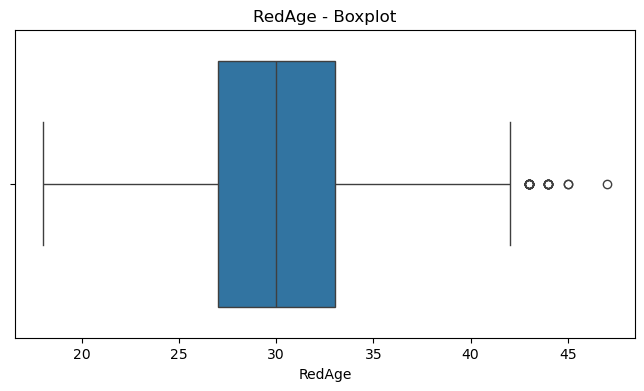

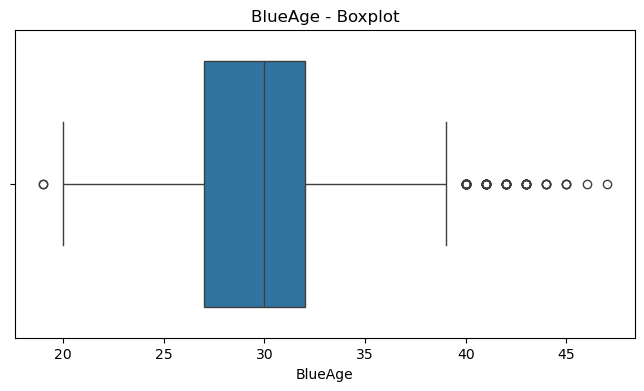

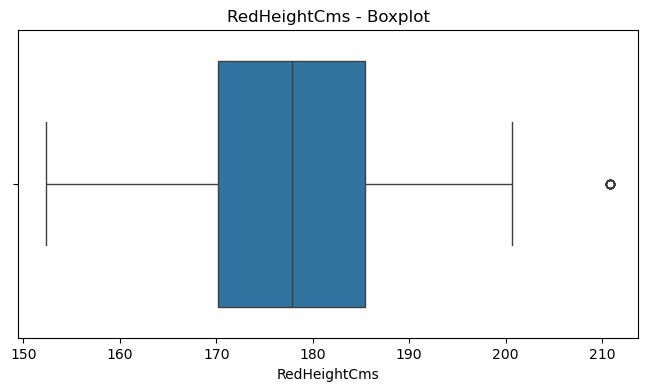

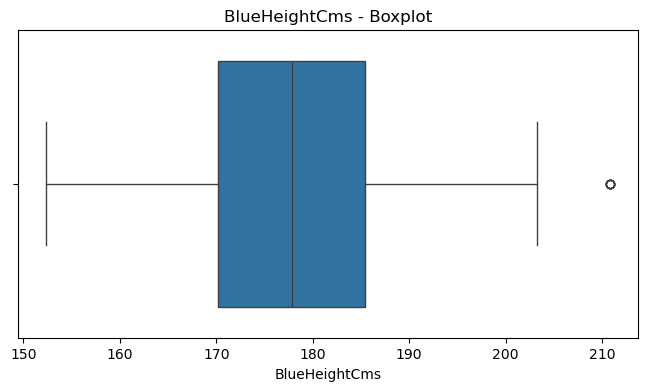

In [14]:
cols = ['RedAge', 'BlueAge', 'RedHeightCms', 'BlueHeightCms']

import seaborn as sns
import matplotlib.pyplot as plt

for col in cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=ufc_raw[col])
    plt.title(f'{col} - Boxplot')
    plt.show()

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 7. Check Clean Data

In [15]:
# Null values check
nulls = ufc_raw.isnull().sum()
print("\nNull values per column:\n", nulls[nulls > 0])

# Duplicate analysis
duplicates = ufc_raw.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


Null values per column:
 Series([], dtype: int64)

Duplicate rows: 0


In [16]:
# Preview the first few records
display(ufc_raw.head())
display(ufc_raw.columns)
# Para ver los tipos de dato de cada columna:
display(ufc_raw.dtypes)


,Winner,TitleBout,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,...,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,BetterRank,TotalFightTimeSecs
0,Blue,False,MALE,5,0,5,0,4.13,0.36,0.0,...,4,-2,-2.54,10.16,-6,0.25,-0.2,-1.83,Red,882.0
1,Red,False,MALE,3,1,0,0,7.36,0.56,1.1,...,-2,-1,5.08,0.00,-5,2.69,0.7,0.20,neither,696.0
2,Red,False,MALE,3,0,4,0,3.32,0.48,0.2,...,1,1,-2.54,-7.62,3,-1.12,-0.2,1.72,Red,717.0
3,Blue,False,MALE,3,2,0,1,5.50,0.47,0.0,...,2,-1,2.54,-2.54,9,2.68,-0.8,-3.62,neither,824.0
4,Blue,False,MALE,3,0,4,0,5.94,0.52,0.0,...,-5,0,0.00,-2.54,0,-0.57,0.0,0.25,neither,900.0


Index(['Winner', 'TitleBout', 'Gender', 'NumberOfRounds',
       'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws',
       'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 'BlueAvgSubAtt',
       'BlueAvgTDLanded', 'BlueAvgTDPct', 'BlueLongestWinStreak', 'BlueLosses',
       'BlueTotalRoundsFought', 'BlueTotalTitleBouts',
       'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit',
       'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission',
       'BlueWinsByTKODoctorStoppage', 'BlueWins', 'BlueStance',
       'BlueHeightCms', 'BlueReachCms', 'BlueWeightLbs',
       'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws',
       'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgSubAtt',
       'RedAvgTDLanded', 'RedAvgTDPct', 'RedLongestWinStreak', 'RedLosses',
       'RedTotalRoundsFought', 'RedTotalTitleBouts',
       'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit',
       'RedWinsByDecisionUnanimous', 'RedWinsByKO', 'RedWinsBySubmission',
       'RedW

Winner                    object
TitleBout                   bool
Gender                    object
NumberOfRounds             int64
BlueCurrentLoseStreak      int64
                          ...   
SigStrDif                float64
AvgSubAttDif             float64
AvgTDDif                 float64
BetterRank                object
TotalFightTimeSecs       float64
Length: 69, dtype: object

## 6. Save

In [19]:
# Save the cleaned file
ufc_raw.to_csv(f'{project_root}/data/processed/ufc_etl.csv', index=False)
print_header("ETL file saved as 'ufc_etl.csv'.", color = 'bright_green')

╔════════════════════════════════════╗
║  ETL file saved as 'ufc_etl.csv'.  ║
╚════════════════════════════════════╝


<div style="text-align: center;">
     <img src="../img/ufc_logo.png" width="800" /> 
</div>